## TODO: run umap instead of tsne
add perplexity as parameter and output

In [1]:
indir = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/dominant_clone_clust/"
outdir= "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/clone_clust_embed/perp30_donperp10"

perplexity = 30
donor_perplexity=10

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join, basename, exists
import click
from glob import glob
from mplh.fig_utils import helper_save as hs
from mplh.cluster_help import plot_cluster as pc
import logging
import os
from matplotlib import rcParams
#import scanpy
#rcParams['lines.markersize'] = 10
import numpy as np
from sklearn.manifold import TSNE

In [4]:
np.random.seed(42)

In [5]:
if not exists(outdir):
    os.mkdir(outdir)

## T-sne and plotting features for t-sne

In [6]:
def run_tsne(df, meta, perplexity):
    X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=perplexity,
                  init='random').fit_transform(df.values)

    tsne_df = pd.DataFrame(X_embedded, index=df.index).rename({0:"t-SNE1",1:"t-SNE2"}, axis=1)

    tsne_meta_df = pd.merge(tsne_df, meta, left_index=True, right_index=True)
    tsne_meta_features_df = pd.merge(tsne_meta_df, df, left_index=True, right_index=True)
    return tsne_meta_features_df


def plot_tsne(tsne_meta_features_df, curr_outdir, features, isCond=True, useAllDonor=True):
    g = sns.FacetGrid(tsne_meta_features_df, col="donor",col_wrap=4)
    if isCond:
        g.map_dataframe(sns.scatterplot, x="t-SNE1", y="t-SNE2", hue="condition", s=20)
    else:
        g.map_dataframe(sns.scatterplot, x="t-SNE1", y="t-SNE2", s=20)
    plt.legend()
    plt.savefig(join(curr_outdir, "umap.pdf"))
    
    for c in features:
        plt.figure()
        sns.scatterplot(data=tsne_meta_features_df, x="t-SNE1", y="t-SNE2", hue=c, s=20)
        plt.suptitle(f"Cluster {c}")
        plt.tight_layout()
        plt.legend()
        plt.savefig(join(curr_outdir, f"clust_{c}.png"))
        
        if isCond:
            g = sns.FacetGrid(tsne_meta_features_df, col="donor", row="condition")
        else:
            g = sns.FacetGrid(tsne_meta_features_df, col="donor", col_wrap=2)    
        g.map_dataframe(sns.scatterplot, x="t-SNE1", y="t-SNE2", hue=c, s=20)
        plt.suptitle(f"Cluster {c}")
        plt.tight_layout()
        plt.legend()
        plt.savefig(join(curr_outdir, f"clust_{c}_split.png"))
        plt.close()
        
    if useAllDonor:
        f=plt.figure()
        if isCond:
            sns.scatterplot(data=tsne_meta_features_df, x="t-SNE1", y="t-SNE2", hue="condition", s=20)
        else:
            sns.scatterplot(data=tsne_meta_features_df, x="t-SNE1", y="t-SNE2", s=20)
        plt.legend()
        plt.savefig(join(curr_outdir, "allDonors_umap.pdf"))

        for c in features:
            if isCond:
                g = sns.FacetGrid(tsne_meta_features_df, col="condition")
                g.map_dataframe(sns.scatterplot, x="t-SNE1", y="t-SNE2", hue=c, s=20)
            else:
                f=plt.figure()
                sns.scatterplot(data=tsne_meta_features_df, x="t-SNE1", y="t-SNE2", hue=c, s=20)
            plt.suptitle(f"Cluster {c}")
            plt.tight_layout()
            plt.legend()
            plt.savefig(join(curr_outdir, f"allDonors_clust_{c}.png"))
            plt.close()
    return

## Run normalized counts

### a)  combined donors

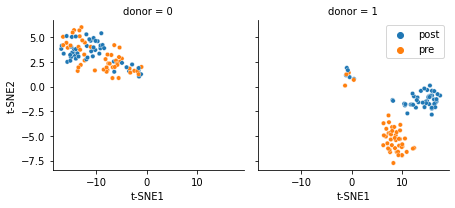

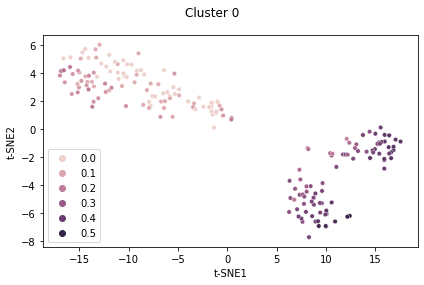

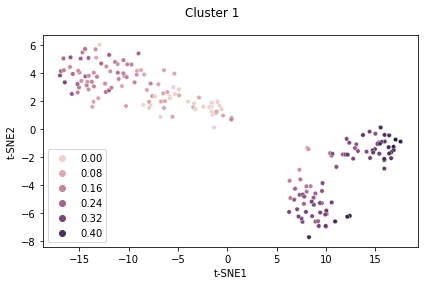

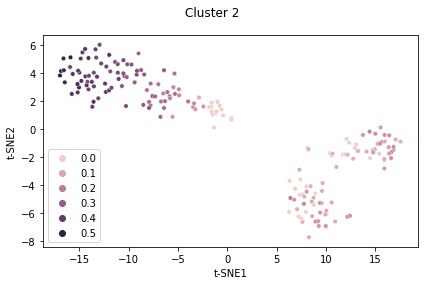

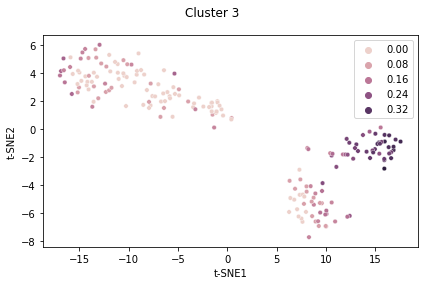

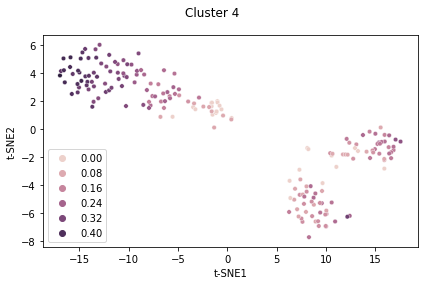

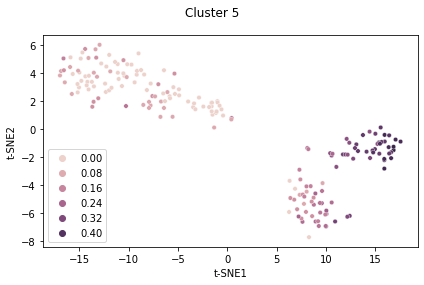

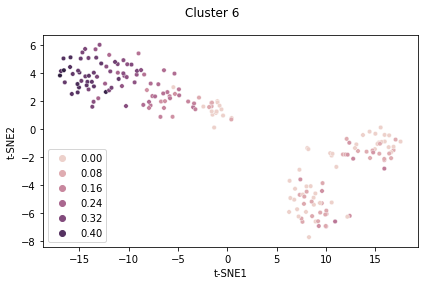

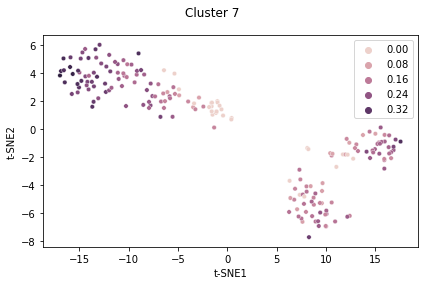

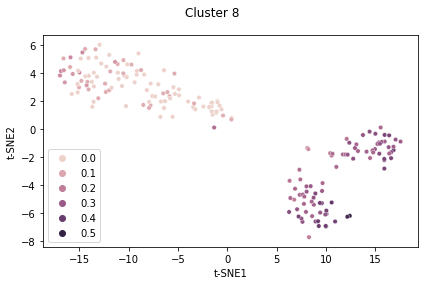

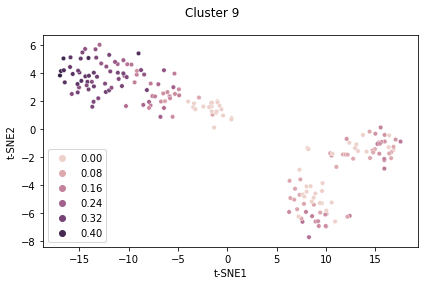

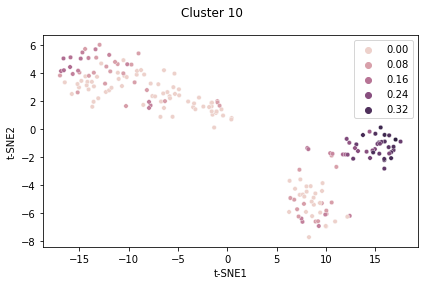

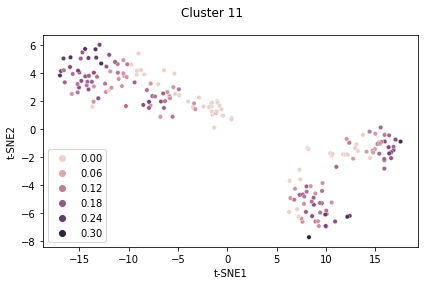

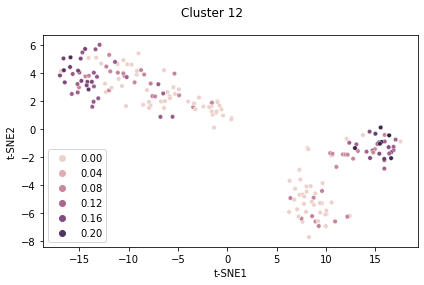

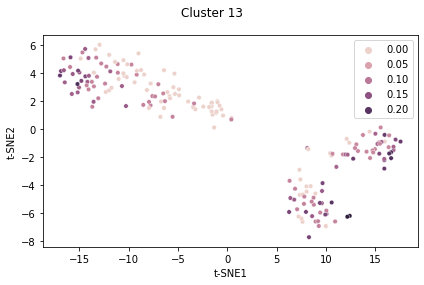

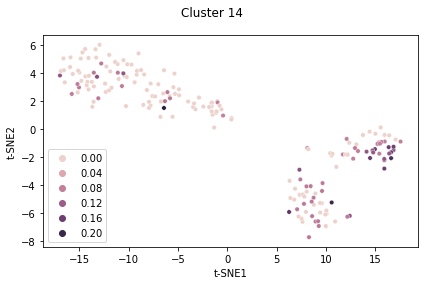

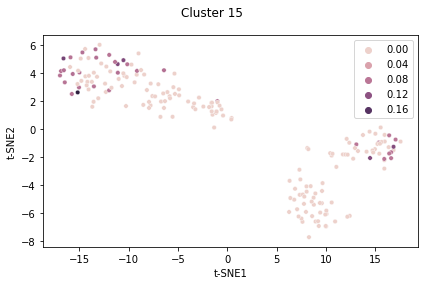

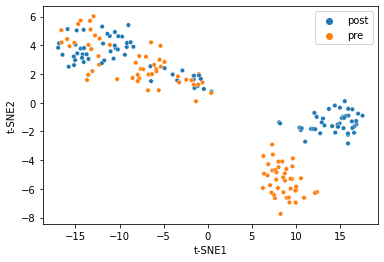

In [7]:
%matplotlib inline

clust_clones_counts_norm = pd.read_csv(join(indir, "cluster_clone_counts_normalized.csv"), index_col=0)
meta = pd.read_csv(join(indir, "cluster_clone_meta.csv"), index_col=0)
clust_clones_counts_norm

combinedDonors_outdir = join(outdir, "combinedDonors")

if not exists(combinedDonors_outdir):
    os.mkdir(combinedDonors_outdir)

tsne_meta_features_df = run_tsne(clust_clones_counts_norm, meta, perplexity=perplexity)
tsne_meta_features_df.to_csv(join(combinedDonors_outdir,"umap.csv"))
plot_tsne(tsne_meta_features_df, combinedDonors_outdir, features=clust_clones_counts_norm.columns,
          useAllDonor=True, isCond=True)

### b)  separate for each donor

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


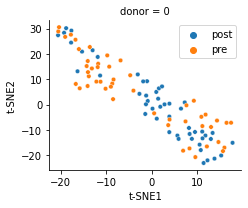

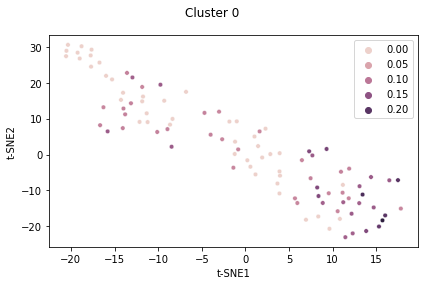

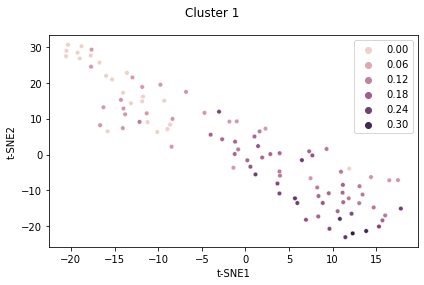

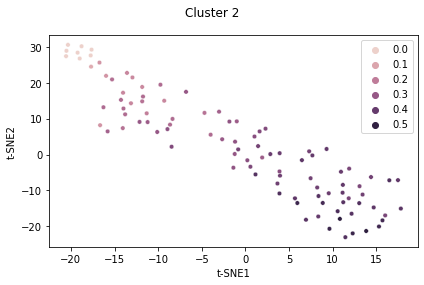

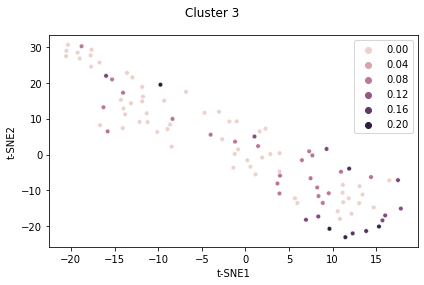

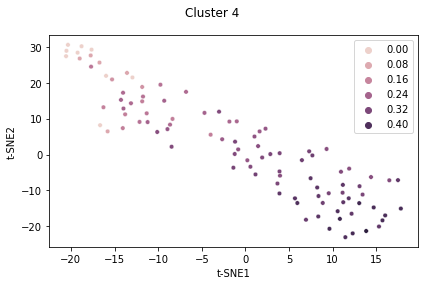

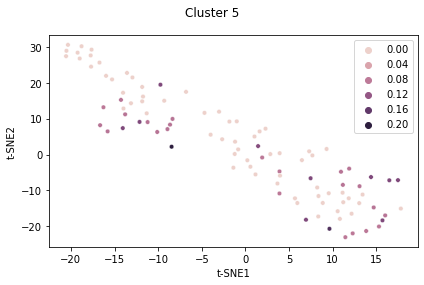

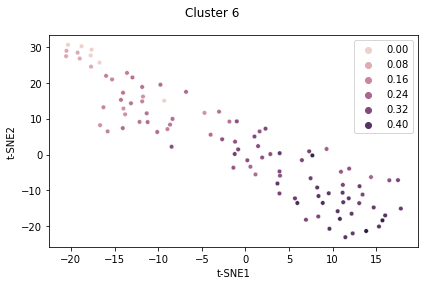

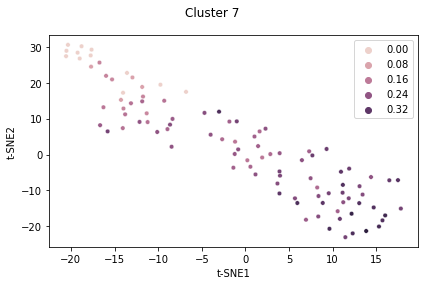

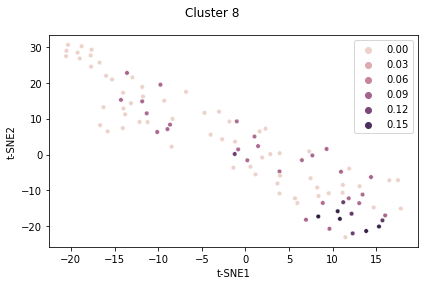

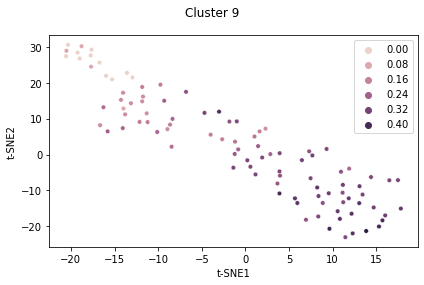

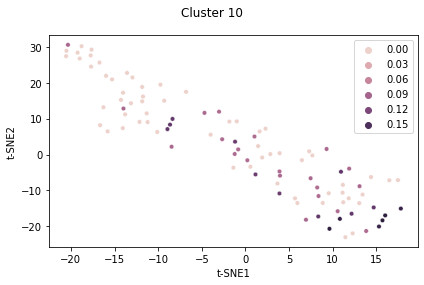

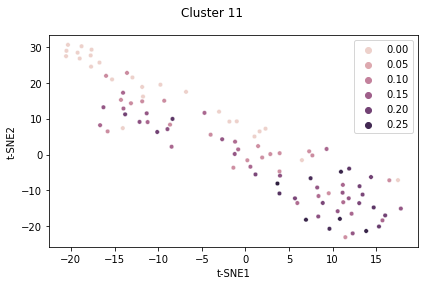

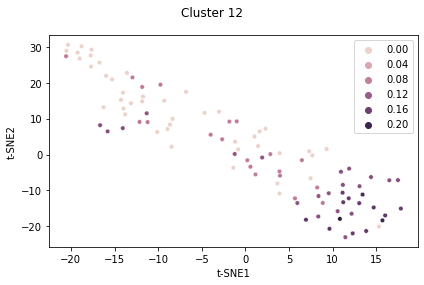

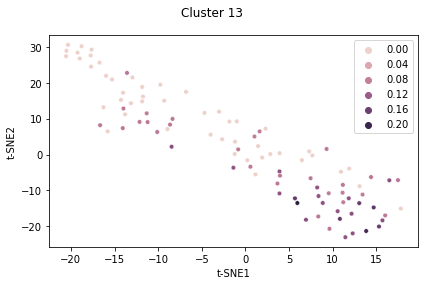

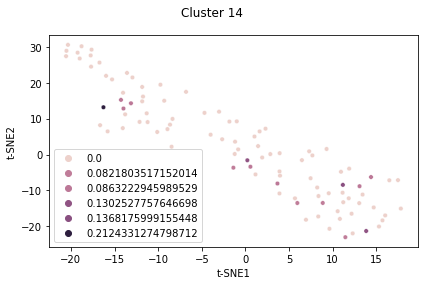

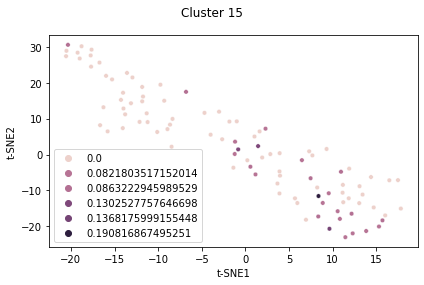

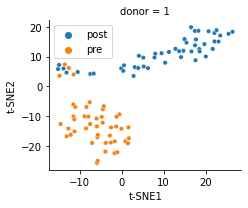

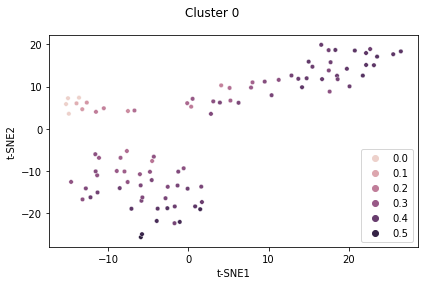

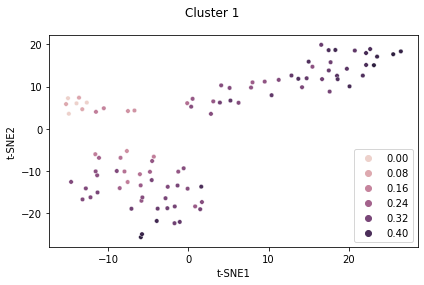

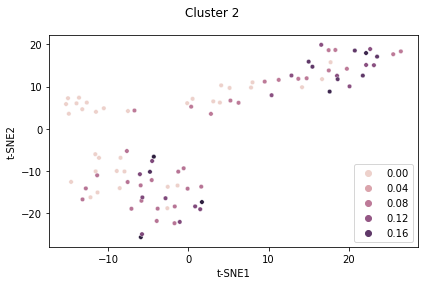

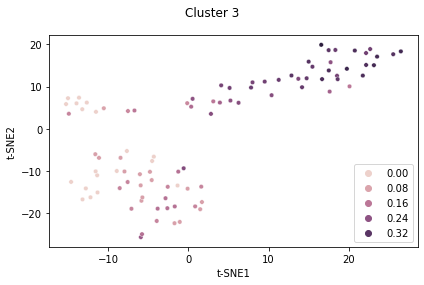

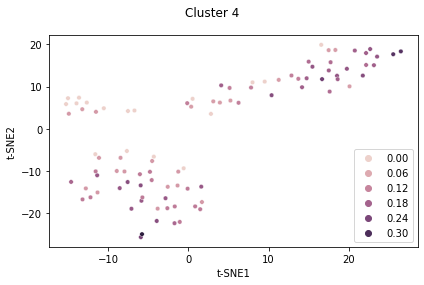

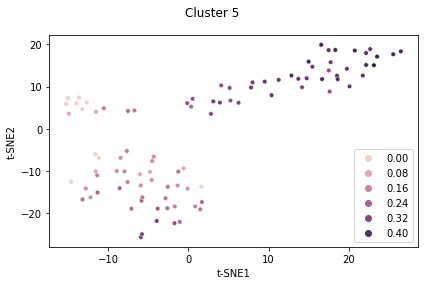

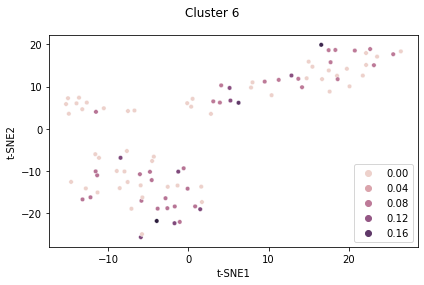

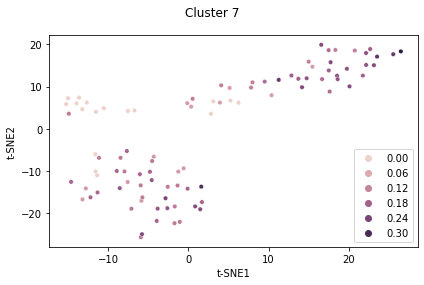

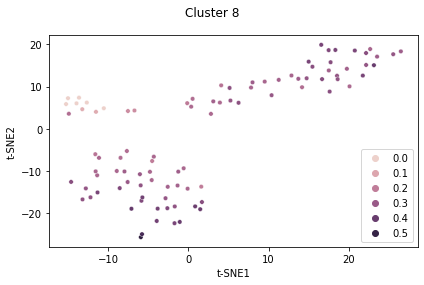

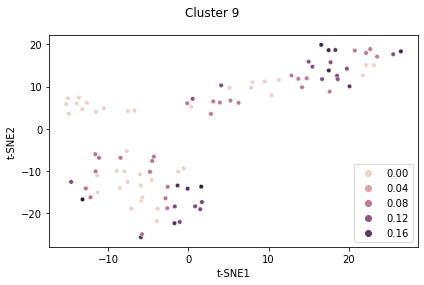

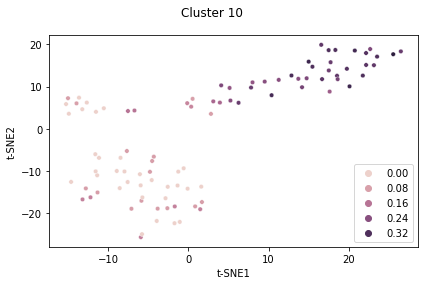

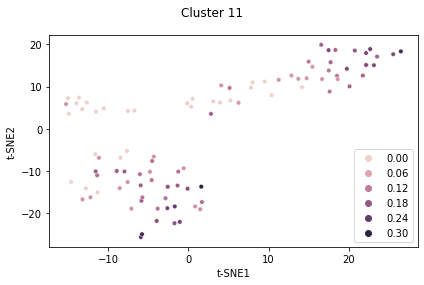

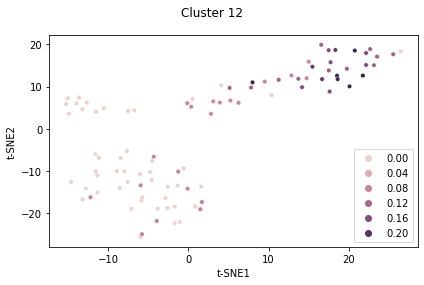

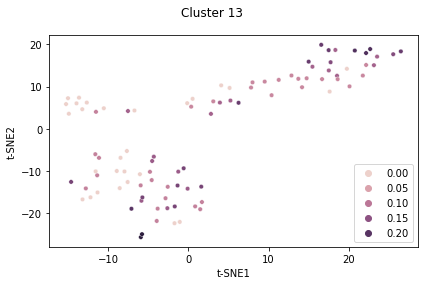

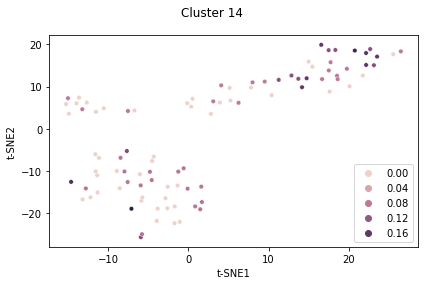

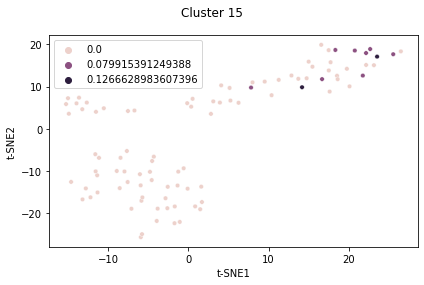

In [8]:
%matplotlib inline

sepDonors_outdir = join(outdir, "sepDonors")
if not exists(sepDonors_outdir):
    os.mkdir(sepDonors_outdir)
for ind, val in meta.groupby("donor"):
    don_dir= join(sepDonors_outdir, f"donor_{ind}")
    if not exists(don_dir):
        os.mkdir(don_dir)

    curr = clust_clones_counts_norm.loc[val.index]    
    tsne_meta_features_df = run_tsne(curr, val, perplexity=donor_perplexity)
    tsne_meta_features_df.to_csv(join(don_dir,"umap.csv"))
    plot_tsne(tsne_meta_features_df, don_dir,features=clust_clones_counts_norm.columns,
              useAllDonor=False, isCond=True) 

## Combine the clones over the conditions

In [9]:
combinedConditions_clust_clones_counts_norm = pd.read_csv(join(indir, "combinedConditions_cluster_clone_counts_normalized.csv"), 
                                                         index_col=0)
combinedConditions_meta = pd.read_csv(join(indir, "combinedConditions_cluster_clone_meta.csv"), index_col=0)
combinedConditions_clust_clones_counts_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
ID,,,,,,,,,,,,,,,,
0_0,0.155794,0.318402,0.539885,0.233692,0.486696,0.180872,0.492461,0.425274,0.180872,0.477454,0.180872,0.304336,0.218685,0.201361,0.123464,0.155794
0_1,0.180872,0.269480,0.517538,0.123464,0.450352,0.123464,0.432687,0.366151,0.155794,0.389486,0.155794,0.246928,0.233692,0.180872,0.000000,0.077897
0_10,0.123464,0.155794,0.414563,0.077897,0.427800,0.123464,0.417338,0.311589,0.077897,0.378423,0.077897,0.258769,0.155794,0.155794,0.000000,0.077897
0_11,0.201361,0.180872,0.411718,0.123464,0.402723,0.077897,0.414563,0.366151,0.123464,0.342149,0.180872,0.218685,0.155794,0.123464,0.000000,0.123464
0_12,0.123464,0.246928,0.430270,0.123464,0.378423,0.000000,0.399557,0.366151,0.155794,0.357156,0.155794,0.123464,0.123464,0.155794,0.000000,0.077897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_5,0.453652,0.458951,0.121237,0.330592,0.291231,0.417601,0.121237,0.274220,0.363710,0.177608,0.363710,0.274220,0.121237,0.214739,0.000000,0.076492
1_6,0.464006,0.431708,0.121237,0.298845,0.197728,0.420081,0.076492,0.177608,0.431708,0.152984,0.312657,0.177608,0.177608,0.214739,0.214739,0.076492
1_7,0.468840,0.417601,0.177608,0.341110,0.229475,0.398480,0.076492,0.242473,0.415065,0.000000,0.312657,0.197728,0.229475,0.121237,0.000000,0.076492


### c) Combining across conditions and donors

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


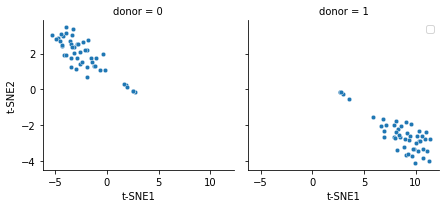

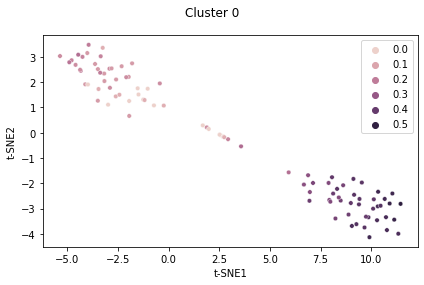

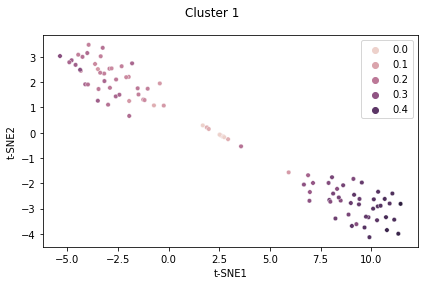

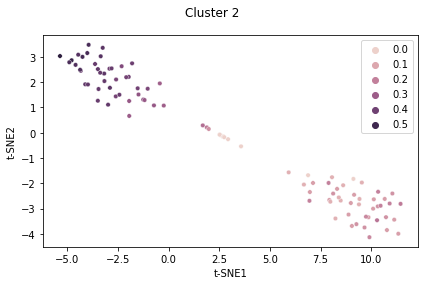

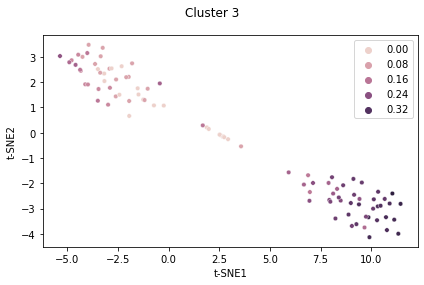

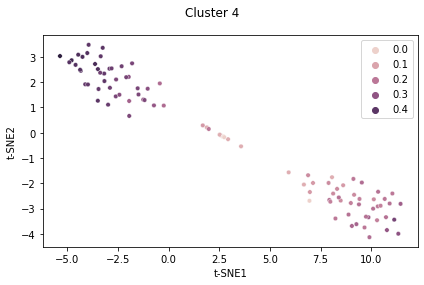

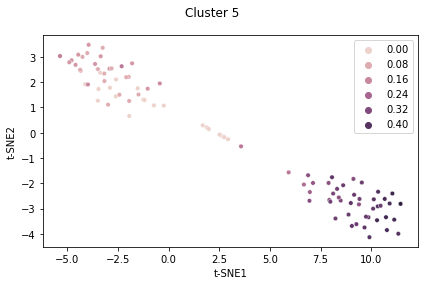

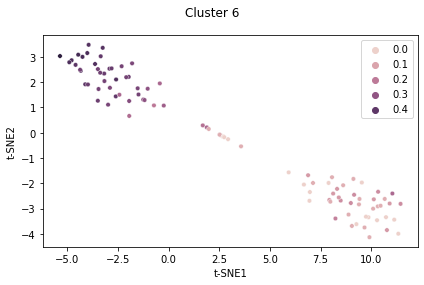

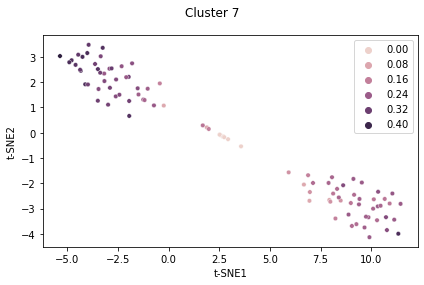

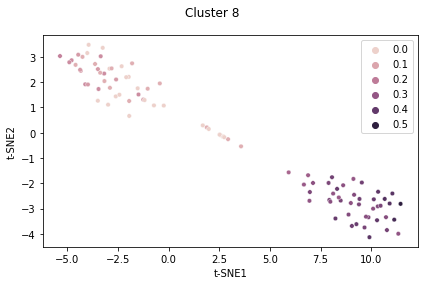

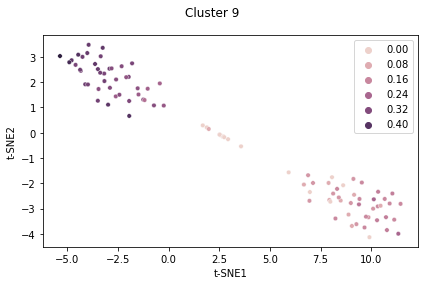

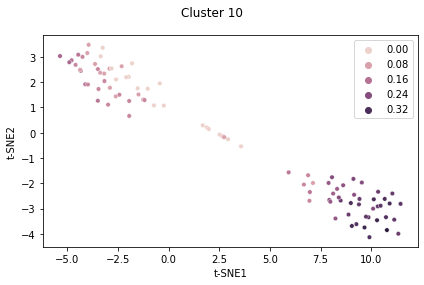

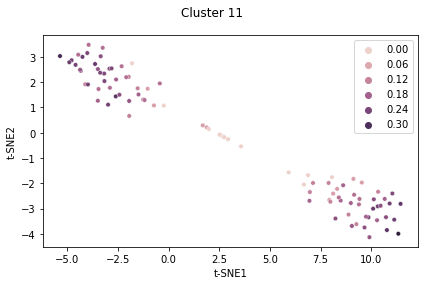

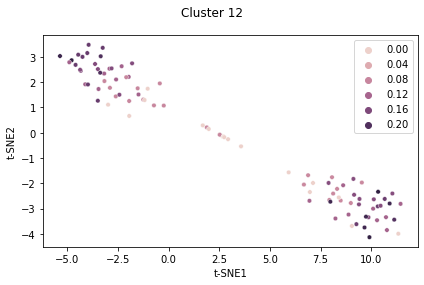

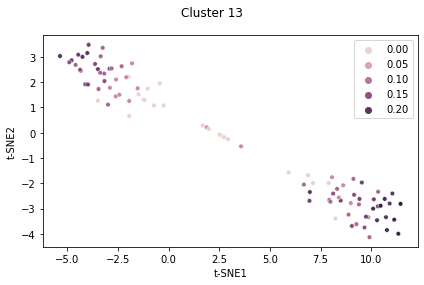

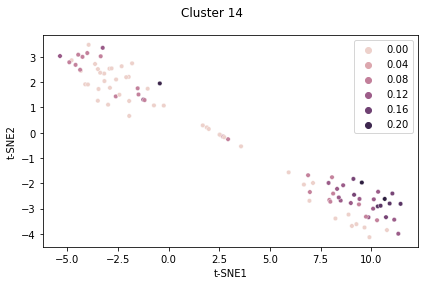

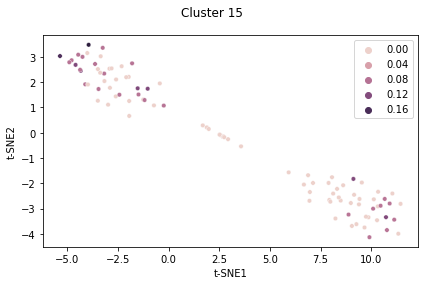

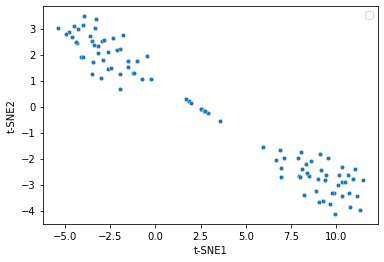

In [10]:
%matplotlib inline
combinedConditions_combinedDonors_outdir = join(outdir, "combinedConditions_combinedDonors")

if not exists(combinedConditions_combinedDonors_outdir):
    os.mkdir(combinedConditions_combinedDonors_outdir)

tsne_meta_features_df = run_tsne(combinedConditions_clust_clones_counts_norm, combinedConditions_meta,
                                perplexity=perplexity)

tsne_meta_features_df.to_csv(join(combinedConditions_combinedDonors_outdir,"umap.csv"))

plot_tsne(tsne_meta_features_df, combinedConditions_combinedDonors_outdir,
          features=combinedConditions_clust_clones_counts_norm.columns,
          isCond=False, useAllDonor=True)

### d) Combining across conditions and separating by donors

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To

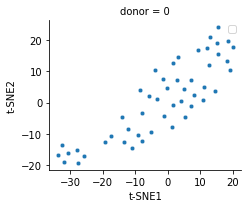

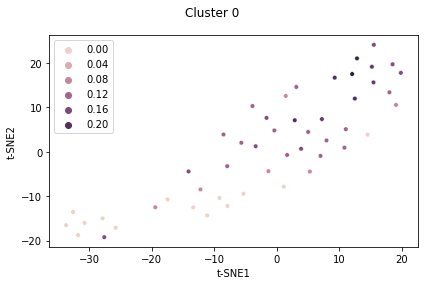

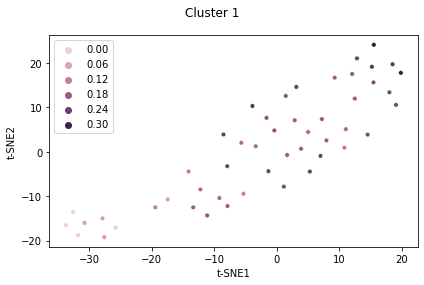

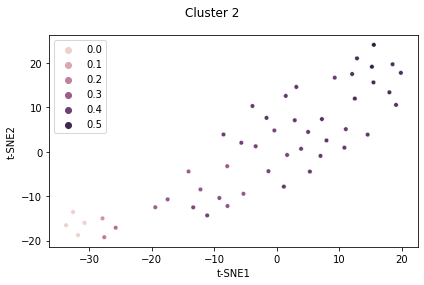

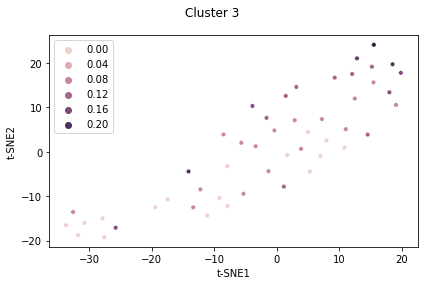

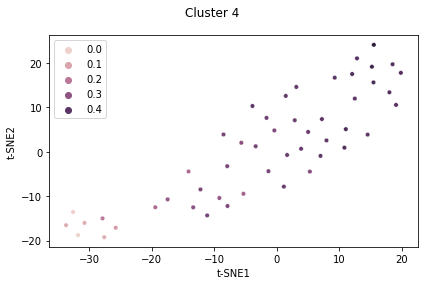

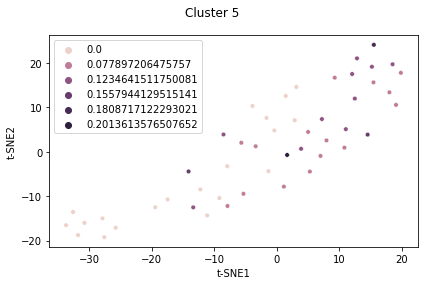

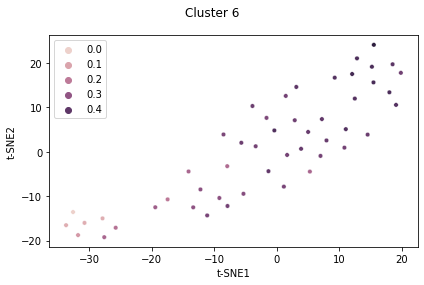

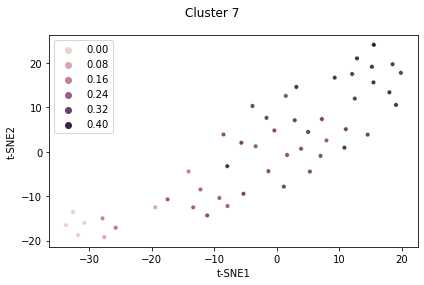

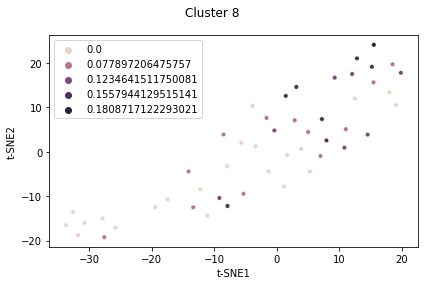

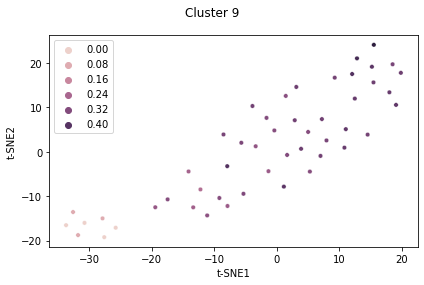

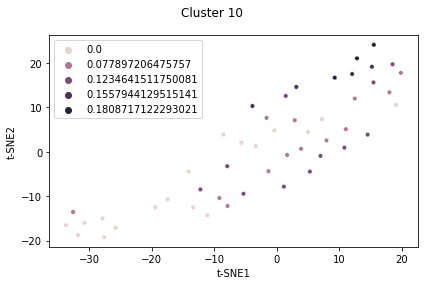

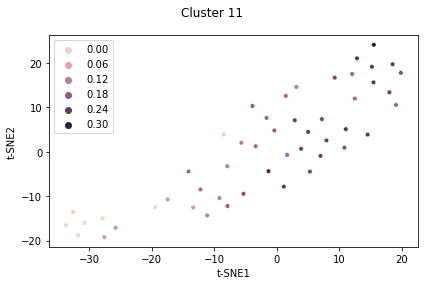

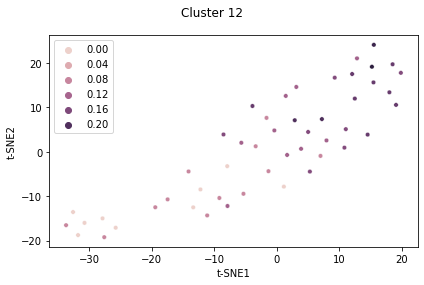

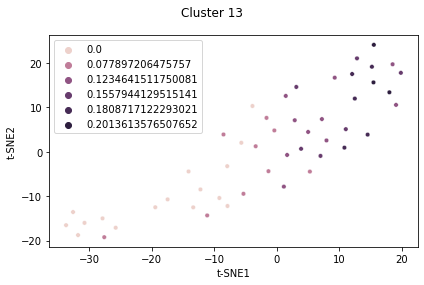

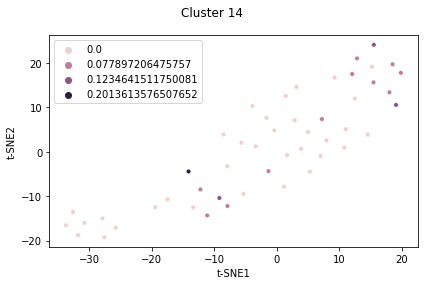

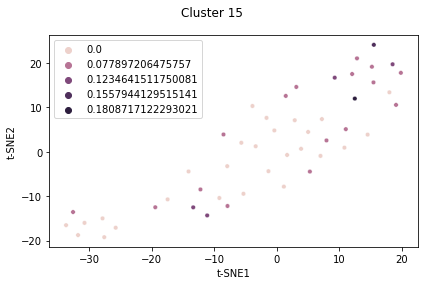

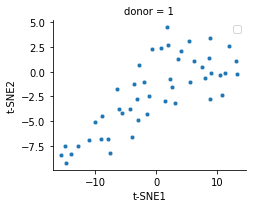

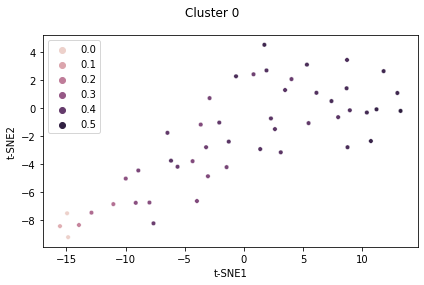

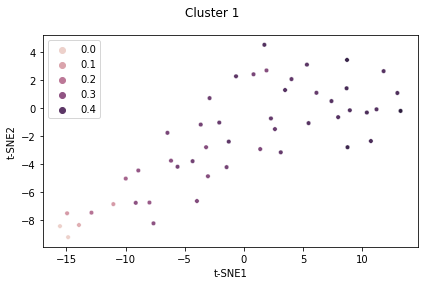

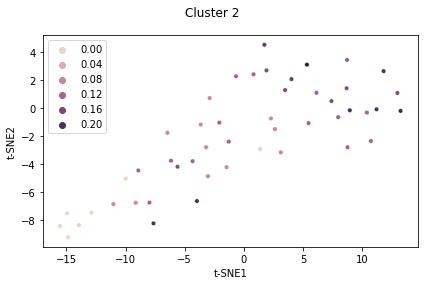

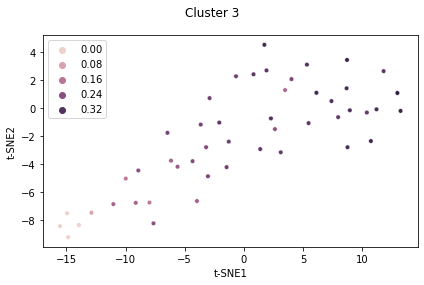

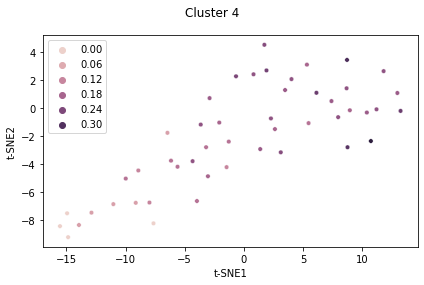

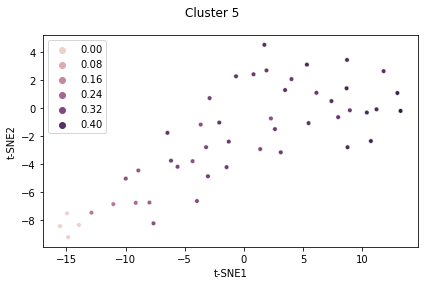

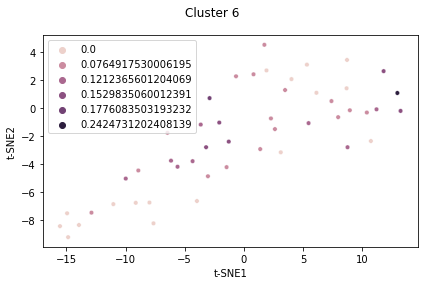

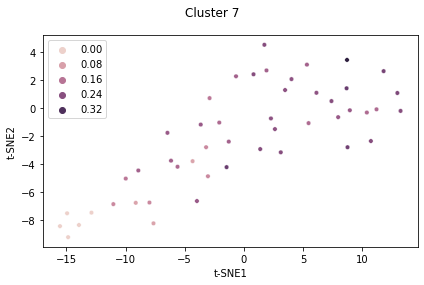

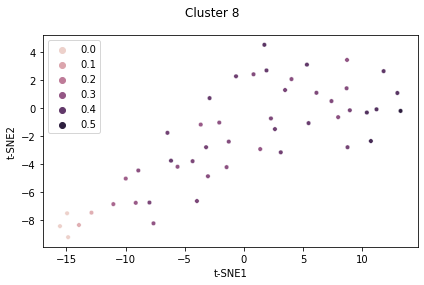

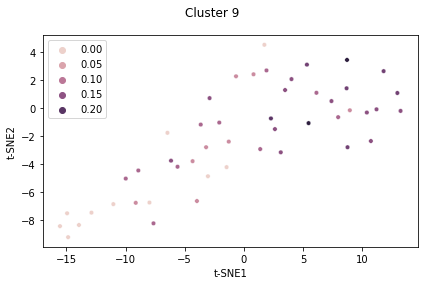

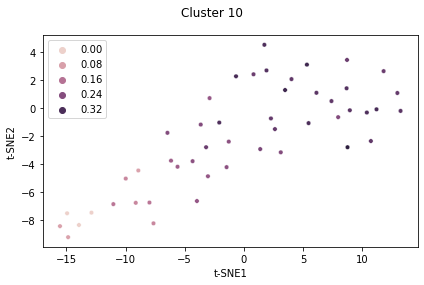

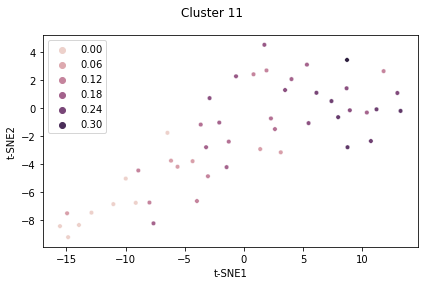

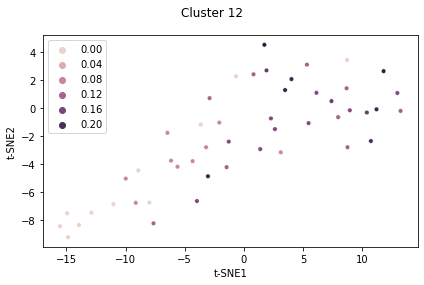

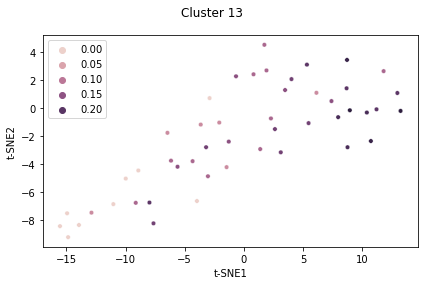

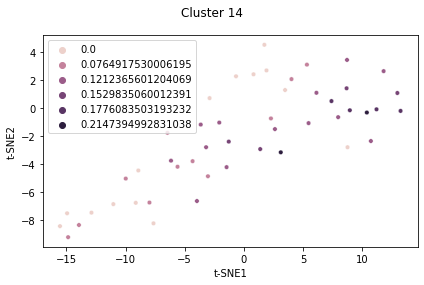

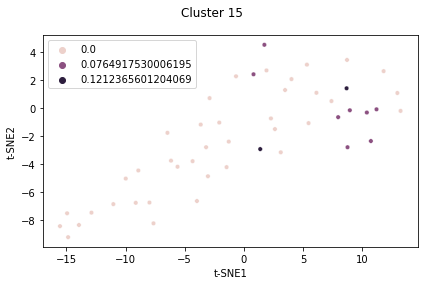

In [11]:
%matplotlib inline

combinedConditions_sepDonors_outdir = join(outdir, "combinedConditions_sepDonors")
if not exists(combinedConditions_sepDonors_outdir):
    os.mkdir(combinedConditions_sepDonors_outdir)
for ind, val in combinedConditions_meta.groupby("donor"):
    don_dir= join(combinedConditions_sepDonors_outdir, f"donor_{ind}")
    if not exists(don_dir):
        os.mkdir(don_dir)

    curr = combinedConditions_clust_clones_counts_norm.loc[val.index]    
    tsne_meta_features_df = run_tsne(curr, val, perplexity=donor_perplexity)
    
    tsne_meta_features_df.to_csv(join(don_dir,"umap.csv"))

    plot_tsne(tsne_meta_features_df, don_dir, features=combinedConditions_clust_clones_counts_norm.columns,
              isCond=False, useAllDonor=False)